# TALLER ANALISIS EXPLORATORIO Y PROCESAMIENTO

## 1. Descripción de conjunto de datos
El conjunto de datos tiene como título "Iris Plants Database" y fue creado por Ronald Fisher en 1936.

## 2. Número de instancias

Primeramente, se importan las librerías necesarias para el análisis exploratorio y procesamiento de datos.

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import sklearn as sk
import sklearn.ensemble as ske
import matplotlib.pyplot as plt

Luego, se importa el conjunto de datos.

In [3]:
iris_data = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

Se muestra el número de instancias del conjunto de datos.

In [4]:
print("Número de instancias: ", len(iris_data))

Número de instancias:  150


## 3. Número de atributos
Se muestra el número de atributos del conjunto de datos.

In [5]:
print("Número de atributos: ", len(iris_data.columns))

Número de atributos:  5


## 4. ¿El conjunto de datos está etiquetado? ¿Cuántas clases tiene?
Sí, el conjunto de datos está etiquetado.
Se muestra el número de clases del conjunto de datos.

In [6]:
print("Número de clases: ", len(iris_data['class'].unique()))

Número de clases:  3


## 5. ¿Cuántos atributos son numéricos y cuántos son categóricos?
Se muestra el número de atributos numéricos y categóricos del conjunto de datos.

In [7]:
print("Número de atributos numéricos: ", len(iris_data.select_dtypes(include=['int64', 'float64']).columns))
print("Número de atributos categóricos: ", len(iris_data.select_dtypes(include=['object']).columns))

Número de atributos numéricos:  4
Número de atributos categóricos:  1


## 6. Reporte la moda para cada atributo categórico.
Se muestra la moda para cada atributo categórico del conjunto de datos.

In [8]:
iris_data['class'].mode()

0        Iris-setosa
1    Iris-versicolor
2     Iris-virginica
Name: class, dtype: object

## 7. Reporte la media, rango desviación estándar para cada atributo numérico.
Se muestra la media, rango y desviación estándar para cada atributo numérico del conjunto de datos.

In [9]:
iris_details = iris_data.describe()
iris_details.loc['range'] = iris_details.loc['max'] - iris_details.loc['min']
iris_details.loc['std'] = iris_details.loc['std'].round(2)
iris_details.loc['range'] = iris_details.loc['range'].round(2)
iris_details.loc['mean'] = iris_details.loc['mean'].round(2)

iris_details.drop(['count', '25%', '50%', '75%'], axis=0, inplace=True)

iris_details.T

,mean,std,min,max,range
sepal_length,5.84,0.83,4.3,7.9,3.6
sepal_width,3.05,0.43,2.0,4.4,2.4
petal_length,3.76,1.76,1.0,6.9,5.9
petal_width,1.20,0.76,0.1,2.5,2.4


## 8. Determine el número de valores falta por atributo.
Se muestra el número de valores falta por atributo del conjunto de datos.

In [10]:
print("Número de valores falta por atributo: ", iris_data.isnull().sum())

Número de valores falta por atributo:  sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


## 9. Determine la distribución de las clases.
Se muestra la distribución de las clases del conjunto de datos.

In [11]:
iris_data['class'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Iris-setosa        33.33%
Iris-versicolor    33.33%
Iris-virginica     33.33%
Name: class, dtype: object

## 10. Determine si existen valores atípicos.
Se muestra si existen valores atípicos en el conjunto de datos.

<Axes: >

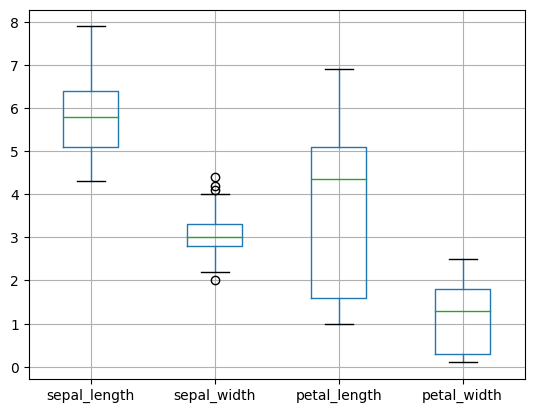

In [12]:
# Boxplot for each class
iris_data.boxplot()

C:\Users\Cantt\AppData\Local\Temp\ipykernel_18776\1073765976.py:13: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in iris_data.groupby(['class']):


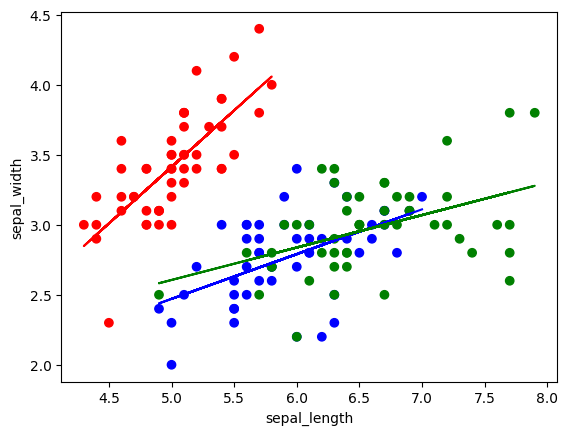

In [22]:
import numpy as np

fig, ax = plt.subplots()
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
line_colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
ax.scatter(iris_data['sepal_length'], iris_data['sepal_width'], c=iris_data['class'].apply(lambda x: colors[x]))

# Set plot labels
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

# Trend line
for key, grp in iris_data.groupby(['class']):
    z = np.polyfit(grp['sepal_length'], grp['sepal_width'], 1)
    p = np.poly1d(z)
    plt.plot(grp['sepal_length'], p(grp['sepal_length']), label=key, color=line_colors[key])
plt.show()


## 11. Aplique al menos dos estrategias diferentes para manejar los datos faltantes.
### 11.1. Eliminar instancias con datos faltantes
Se eliminan las instancias con datos faltantes.

In [14]:
iris_data_no_missing = iris_data.dropna()
iris_data_no_missing

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 11.2. Imputar datos faltantes
Se imputan los datos faltantes con la media de cada atributo.

In [15]:
iris_data_missing_mean = iris_data.fillna(iris_data.mean(numeric_only=True))
iris_data_missing_mean

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 12. Convierta todos los atributos numéricos a categóricos utilizando dos estrategias diferentes.
### 12.1. Convierta todos los atributos numéricos a categóricos utilizando la estrategia de intervalos.
Se convierten todos los atributos numéricos a categóricos utilizando la estrategia de intervalos.

In [16]:
iris_data_interval = iris_data.copy()
iris_data_interval['sepal_length'] = pd.cut(iris_data_interval['sepal_length'], bins=3, labels=['low', 'medium', 'high'])
iris_data_interval['sepal_width'] = pd.cut(iris_data_interval['sepal_width'], bins=3, labels=['low', 'medium', 'high'])
iris_data_interval['petal_length'] = pd.cut(iris_data_interval['petal_length'], bins=3, labels=['low', 'medium', 'high'])
iris_data_interval['petal_width'] = pd.cut(iris_data_interval['petal_width'], bins=3, labels=['low', 'medium', 'high'])
iris_data_interval

,sepal_length,sepal_width,petal_length,petal_width,class
0,low,medium,low,low,Iris-setosa
1,low,medium,low,low,Iris-setosa
2,low,medium,low,low,Iris-setosa
3,low,medium,low,low,Iris-setosa
4,low,medium,low,low,Iris-setosa
...,...,...,...,...,...
145,medium,medium,high,high,Iris-virginica
146,medium,low,high,high,Iris-virginica
147,medium,medium,high,high,Iris-virginica
148,medium,medium,high,high,Iris-virginica


### 12.2. Convierta todos los atributos numéricos a categóricos utilizando la estrategia de frecuencias.
Se convierten todos los atributos numéricos a categóricos utilizando la estrategia de frecuencias.

In [17]:
iris_data_frequency = iris_data.copy()
iris_data_frequency['sepal_length'] = pd.qcut(iris_data_frequency['sepal_length'], q=3, labels=['low', 'medium', 'high'])
iris_data_frequency['sepal_width'] = pd.qcut(iris_data_frequency['sepal_width'], q=3, labels=['low', 'medium', 'high'])
iris_data_frequency['petal_length'] = pd.qcut(iris_data_frequency['petal_length'], q=3, labels=['low', 'medium', 'high'])
iris_data_frequency['petal_width'] = pd.qcut(iris_data_frequency['petal_width'], q=3, labels=['low', 'medium', 'high'])
iris_data_frequency

,sepal_length,sepal_width,petal_length,petal_width,class
0,low,high,low,low,Iris-setosa
1,low,medium,low,low,Iris-setosa
2,low,medium,low,low,Iris-setosa
3,low,medium,low,low,Iris-setosa
4,low,high,low,low,Iris-setosa
...,...,...,...,...,...
145,high,medium,high,high,Iris-virginica
146,medium,low,high,high,Iris-virginica
147,high,medium,high,high,Iris-virginica
148,medium,high,high,high,Iris-virginica


## 13. Transforme el conjunto de datos de manera que todos los atributos sean numéricos.
Se transforma el conjunto de datos de manera que todos los atributos sean numéricos.

In [18]:
iris_data_numeric = iris_data.copy()
iris_data_numeric['sepal_length'] = iris_data_numeric['sepal_length'].astype('float64')
iris_data_numeric['sepal_width'] = iris_data_numeric['sepal_width'].astype('float64')
iris_data_numeric['petal_length'] = iris_data_numeric['petal_length'].astype('float64')
iris_data_numeric['petal_width'] = iris_data_numeric['petal_width'].astype('float64')

iris_data_numeric.replace({'class': {'Iris-setosa': 1.0, 'Iris-versicolor': 2.0, 'Iris-virginica': 3.0}}, inplace=True)

iris_data_numeric

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3.0
146,6.3,2.5,5.0,1.9,3.0
147,6.5,3.0,5.2,2.0,3.0
148,6.2,3.4,5.4,2.3,3.0


## 14. Escoja una técnica para la detección de valores atípicos y aplíquela al conjunto de datos.
Se aplica la técnica de detección de valores atípicos Isolation Forest.

In [19]:
iris_data_outliers = iris_data.copy()
iris_data_outliers['outlier'] = ske.IsolationForest().fit_predict(iris_data_outliers[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_data_outliers['outlier'] = iris_data_outliers['outlier'].apply(lambda x: 'outlier' if x == -1 else 'normal')
iris_data_outliers.groupby('outlier').count()

,sepal_length,sepal_width,petal_length,petal_width,class
outlier,,,,,
normal,110,110,110,110,110
outlier,40,40,40,40,40


### 14.1. Aplique otra técnica para la detección de valores atípicos y compare los resultados.
Se aplica la técnica de detección de valores atípicos Local Outlier Factor.

In [20]:
iris_data_outliers = iris_data.copy()
iris_data_outliers['outlier'] = sk.neighbors.LocalOutlierFactor().fit_predict(iris_data_outliers[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_data_outliers['outlier'] = iris_data_outliers['outlier'].apply(lambda x: 'outlier' if x == -1 else 'normal')
iris_data_outliers.groupby('outlier').count()

,sepal_length,sepal_width,petal_length,petal_width,class
outlier,,,,,
normal,144,144,144,144,144
outlier,6,6,6,6,6


### 14.2. Aplique la técnica de KMeans para la detección de valores atípicos y compare los resultados.
Se aplica la técnica de detección de valores atípicos KMeans.

In [21]:
iris_data_outliers = iris_data.copy()
iris_data_outliers['outlier'] = KMeans(n_clusters=3).fit_predict(iris_data_outliers[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_data_outliers['outlier'] = iris_data_outliers['outlier'].apply(lambda x: 'outlier' if x == 2 else 'normal')
iris_data_outliers.groupby('outlier').count()

D:\Projects\iris\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,class
outlier,,,,,
normal,112,112,112,112,112
outlier,38,38,38,38,38
